     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


C:\Users\akash\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\akash\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\akash\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\akash\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

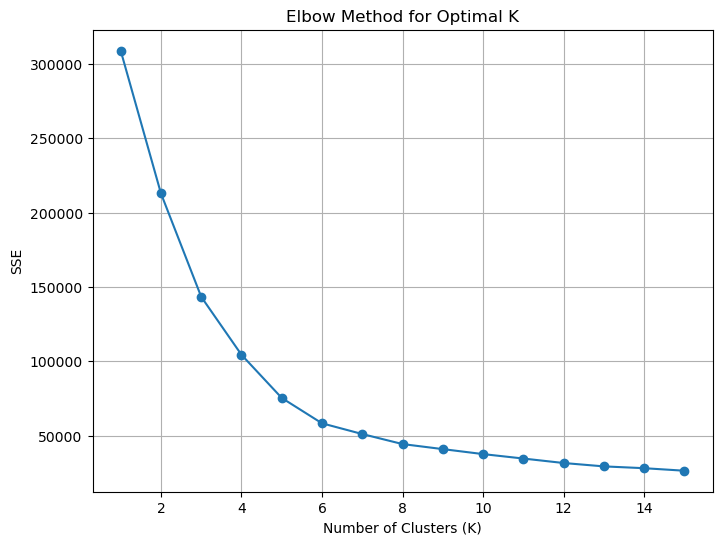

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read a CSV file
df = pd.read_csv('Mall_Customers.csv')
print(df)

# Encode the "Genre" (Gender) column into numerical values (0 for Male, 1 for Female)
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})

# Select relevant features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre']]

# Initialize an empty list to store SSE values
sse = []

# Iterate through a range of K values (1 to 15)
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # Inertia is the SSE

# Plot the SSE values to find the elbow point
plt.figure(figsize=(8, 6))
plt.plot(range(1, 16), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.grid(True)
plt.show()


# Select the number of cluster from the elbow curve

In [6]:
# Assuming you've chosen K=4 as the optimal value
optimal_k = 5
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans_optimal.fit_predict(X)
print(df)

C:\Users\akash\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\akash\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


     CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1      0   19                  15                      39   
1             2      0   21                  15                      81   
2             3      1   20                  16                       6   
3             4      1   23                  16                      77   
4             5      1   31                  17                      40   
..          ...    ...  ...                 ...                     ...   
195         196      1   35                 120                      79   
196         197      1   45                 126                      28   
197         198      0   32                 126                      74   
198         199      0   32                 137                      18   
199         200      0   30                 137                      83   

     Cluster  
0          0  
1          4  
2          0  
3          4  
4          0  
..       

# Visualization of the clusters

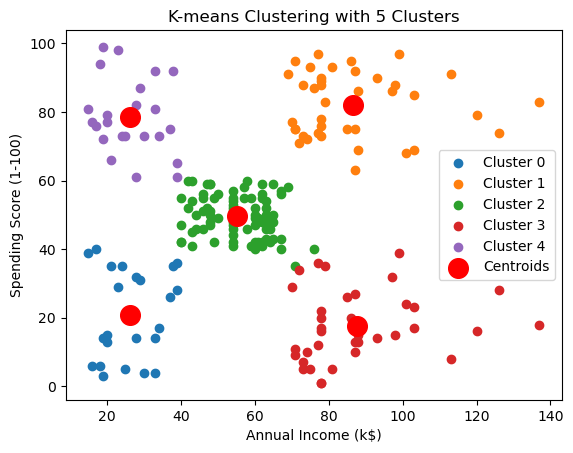

In [7]:
feature1 = 'Annual Income (k$)'
feature2 = 'Spending Score (1-100)'
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], label=f'Cluster {cluster}')
plt.scatter(kmeans_optimal.cluster_centers_[:, X.columns.get_loc(feature1)], kmeans_optimal.cluster_centers_[:, X.columns.get_loc(feature2)], s=200, c='red', label='Centroids')
plt.title(f'K-means Clustering with {optimal_k} Clusters')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.show()